## Basis in One Dimension

---

During the experiments, one of the most common operations is to create a basis set in one dimension. A popular choice for the basis set is a set of one dimensional quantum harmonic oscillator functions. The libary makes it simple to work with harmonic oscillator basis functions. Let’s start by importing the relevant functions

In [1]:
from transit_chem.basis import HarmonicOscillator
import numpy as np
import matplotlib.pyplot as plt

The harmonic oscillator is represented by a custom built class in transit_chem Each new instance is parametrized on quantum number, center of the well, frequency and mass of the particle.

In [2]:
ho = HarmonicOscillator(n=0, center=0.0)
ho

HarmonicOscillator(n=0, center=0.0, mass=1.0, omega=1.0)

The harmonic oscillator will remember its state, so to use it 
later on, all we need to do is call it with a value of `x`

In [3]:
ho(0.0)

0.7511255444649425

It can also accept numpy arrays

In [4]:
x = np.linspace(-3, 3, 10)
ho(x)

array([0.00834425, 0.04937038, 0.18729481, 0.45558067, 0.71053432,
       0.71053432, 0.45558067, 0.18729481, 0.04937038, 0.00834425])

You can even create a list of these, and call them later in on a numpy array to plot all at once. Since they are classes with overloaded repr methods, the instance itself can be used as an informative label.

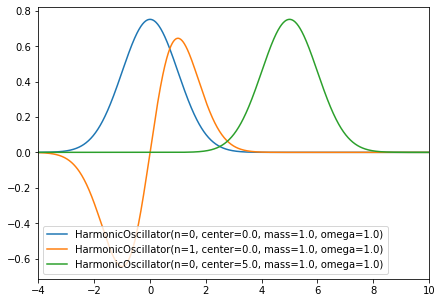

In [5]:
x = np.linspace(-4, 10, 1000)

hos = [
    HarmonicOscillator(n=0, center=0.0), 
    HarmonicOscillator(n=1, center=0.0),
    HarmonicOscillator(n=0, center=5.0)
]

fig = plt.figure(figsize=(7,5))
for ho in hos:
    plt.plot(x, ho(x), label=repr(ho))

plt.legend()
plt.xlim(-4, 10)
plt.show()

Each function also knows about its potential, which can be accessed via the `.potential` attribute

In [6]:
ho.potential

HarmonicPotential(center=5.0, mass=1.0, omega=1.0)

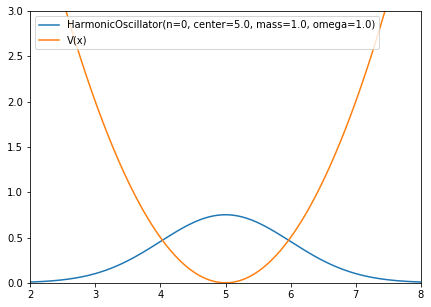

In [7]:
fig = plt.figure(figsize=(7,5))
plt.plot(x, ho(x), label=str(ho))
plt.plot(x, ho.potential(x), label="V(x)")
plt.legend()
plt.ylim(0.0, 3)
plt.xlim(2, 8)
plt.show()

The energy is easily accessible,

In [8]:
ho.energy

0.5

And finally, the kinetic energy operator can be applied to the function:

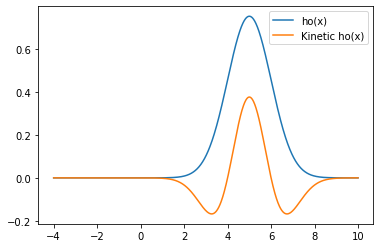

In [9]:
k = ho.__kinetic__()
plt.plot(x, ho(x), label="ho(x)")
plt.plot(x, k(x), label="Kinetic ho(x)")
plt.legend()
plt.show()